In [1]:
# Titanic Dataset
# 1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case in class. 
# 	a. Do you think we should keep this feature? 
# 2. Do at least two visualizations to describe or show correlations.  
# 3. Implement Naïve Bayes method using scikit-learn library and report the accuracy. 

In [2]:
import pandas as pd

##Getting the data
train_df = pd.read_csv('Dataset//train.csv')
test_df = pd.read_csv('Dataset//test.csv')

##Data Exploration/Analysis
combine = [train_df, test_df]
print('Columns: ',train_df.columns.values)

print("\ndataframe.info, information about features")
train_df.info()

print("\ndataframe.head, by default displays first 5 rows")
train_df.head()

Columns:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']

dataframe.info, information about features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

dataframe.head, by default displays first 5 rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("dataframe.describe(), displays summary of statistics")
train_df.describe()

dataframe.describe(), displays summary of statistics


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [5]:
##Analyze by pivoting features ---> the higher the number means more correlation with the target

## Sex - Categorical non-numeric
## correlation between column 1 and column2
print(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*20)


"""Sex=Female passengers had much better survival rate than males-  had very high survival rate of 74% 
Which shows we can consider Sex as a Feature for model training and we can confirm through visualisation"""

      Sex  Survived
0  female  0.742038
1    male  0.188908
____________________


'Sex=Female passengers had much better survival rate than males-  had very high survival rate of 74% \nWhich shows we can consider Sex as a Feature for model training and we can confirm through visualisation'

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

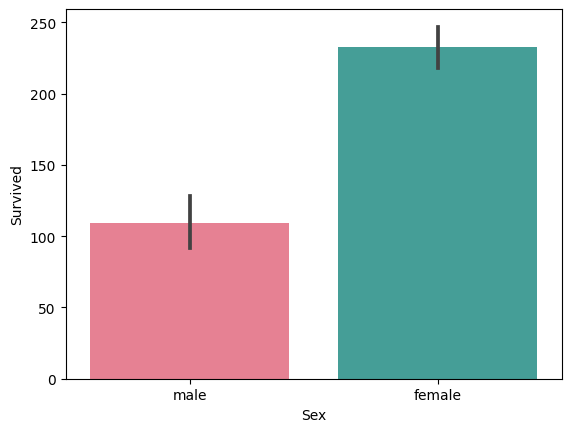

In [6]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Sex", y="Survived", data=train_df, estimator=sum, palette="husl")


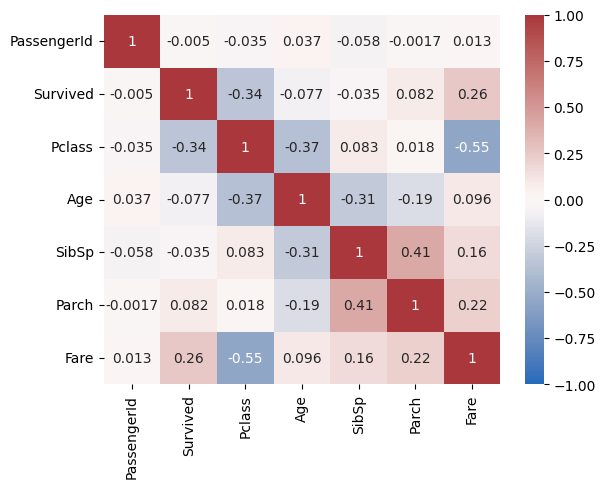

In [7]:
sns.heatmap(train_df.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [8]:
train_df.corr().style.background_gradient(cmap="Reds")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


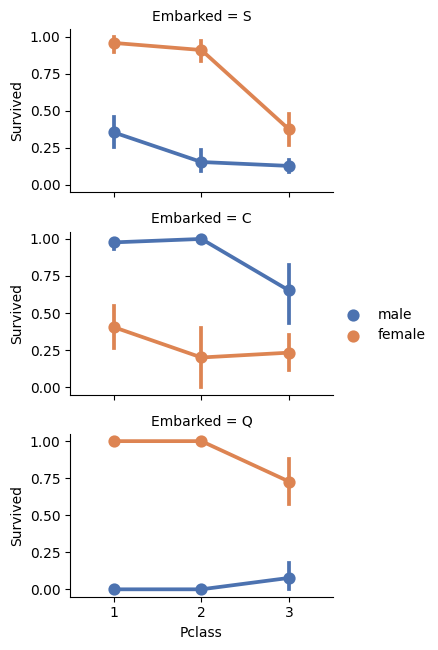

In [9]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep',order=[1, 2, 3], hue_order=None)
grid.add_legend()


## Observed.
# Female passengers had much better survival rate than males.
# Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
# Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
# Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

#Conclusion: Add Sex feature to model training.


In [10]:
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)

In [11]:
##Preprocessing of Data
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
for dataset in combine:
     dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Jonkheer', 'Dona'], 'Lady')
     dataset['Title'] = dataset['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir')
     dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

title_mapping = {"Col": 1, "Dr": 2, "Lady": 3, "Master": 4, "Miss": 5, "Mr": 6, "Mrs": 7, "Rev": 8, "Sir": 9}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    

common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    
meanAge = int(train_df.Age.dropna().mean())

for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(meanAge)
    dataset['Fare'] = dataset['Fare'].fillna(test_df['Fare'].dropna().median())



In [12]:
combine[0].to_csv('Dataset//train_preprocessed.csv',index=False)
combine[1].to_csv('Dataset//test_preprocessed.csv',index=False)

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('Dataset//train_preprocessed.csv')
test_df = pd.read_csv('Dataset//test_preprocessed.csv')
print(train_df.isnull().sum())
print('-'*10)
print(test_df.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
dtype: int64


In [14]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]

X_test = test_df.drop("PassengerId",axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [15]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_training_pred = gaussian.predict(X_train)
print(classification_report(Y_train, Y_training_pred))
print(confusion_matrix(Y_train, Y_training_pred))
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print('accuracy of Guassian NB',acc_gaussian)

Y_pred = gaussian.predict(X_test)


              precision    recall  f1-score   support

           0       0.82      0.81      0.82       549
           1       0.70      0.72      0.71       342

    accuracy                           0.78       891
   macro avg       0.76      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891

[[445 104]
 [ 95 247]]
accuracy of Guassian NB 77.67


In [16]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
multinomial = MultinomialNB()
multinomial.fit(X_train, Y_train)

Y_pred = multinomial.predict(X_test)
Y_training_pred = multinomial.predict(X_train)
print(classification_report(Y_train, Y_training_pred))
print(confusion_matrix(Y_train, Y_training_pred))
# Summary of the predictions made by the classifier
acc_multinomial = round(multinomial.score(X_train, Y_train) * 100, 2)

print('accuracy of Multinomail NB',acc_multinomial)

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       549
           1       0.64      0.48      0.55       342

    accuracy                           0.70       891
   macro avg       0.68      0.65      0.66       891
weighted avg       0.69      0.70      0.68       891

[[457  92]
 [179 163]]
accuracy of Multinomail NB 69.58


In [17]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
Bernoulli = BernoulliNB()
Bernoulli.fit(X_train, Y_train)

Y_pred = Bernoulli.predict(X_test)
Y_training_pred = Bernoulli.predict(X_train)
print(classification_report(Y_train, Y_training_pred))
print(confusion_matrix(Y_train, Y_training_pred))
# Summary of the predictions made by the classifier
acc_Bernoulli = round(Bernoulli.score(X_train, Y_train) * 100, 2)

print('accuracy of Bernoulli NB',acc_Bernoulli)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891

[[468  81]
 [109 233]]
accuracy of Bernoulli NB 78.68


In [18]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
Complement = ComplementNB()
Complement.fit(X_train, Y_train)

Y_pred = Complement.predict(X_test)
Y_training_pred = Complement.predict(X_train)
print(classification_report(Y_train, Y_training_pred))
print(confusion_matrix(Y_train, Y_training_pred))
# Summary of the predictions made by the classifier
acc_Complement = round(Complement.score(X_train, Y_train) * 100, 2)

print('accuracy of Complement NB',acc_Complement)

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       549
           1       0.64      0.48      0.55       342

    accuracy                           0.70       891
   macro avg       0.68      0.66      0.66       891
weighted avg       0.69      0.70      0.69       891

[[455  94]
 [177 165]]
accuracy of Complement NB 69.58


In [19]:
models = pd.DataFrame({
    'Model': ['GaussianNB','MultinomialNB','BernoulliNB','ComplementNB'],
    'Score': [acc_gaussian,acc_multinomial,acc_Bernoulli,acc_Complement]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,BernoulliNB,78.68
0,GaussianNB,77.67
1,MultinomialNB,69.58
3,ComplementNB,69.58


In [20]:
# # Question 2
# 1. Implement Naïve Bayes method using scikit-learn library. 
# 	a. Use the glass dataset available in Link also provided in your assignment.
# 	b. Use train_test_split to create training and testing part. 
# 2. Evaluate the model on testing part using score and Classification Report 

In [21]:
import pandas as pd

##Getting the data
glass = pd.read_csv('Dataset//glass.csv')
print('Columns: ',glass.columns.values)
print("\ndataframe.info, information about features")
glass.info()
print("\ndataframe.head, by default displays first 5 rows")
glass.head()

Columns:  ['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'Type']

dataframe.info, information about features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

dataframe.head, by default displays first 5 rows


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [22]:
print("dataframe.describe(), displays summary of statistics")
glass.describe()

dataframe.describe(), displays summary of statistics


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [23]:
print(glass.isnull().sum())
print('-'*10)

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
----------


In [24]:
glass.corr().style.background_gradient(cmap="Reds")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


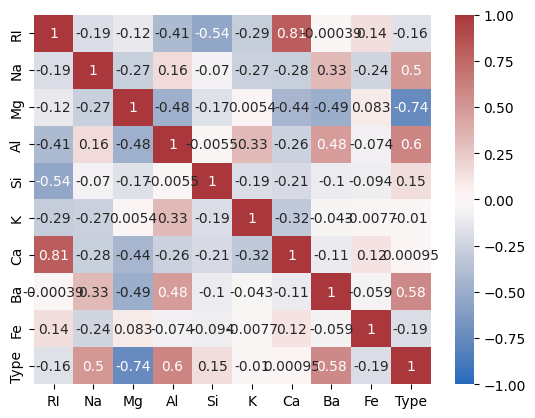

In [25]:
sns.heatmap(glass.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(glass[::-1], glass.iloc[:, -1].values,test_size=0.2, random_state=1)

In [27]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
glass_acc_gaussian = accuracy_score(y_pred,y_test)
print('accuracy is',glass_acc_gaussian )

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]
accuracy is 0.8372093023255814


In [28]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
multinomial = MultinomialNB()
multinomial.fit(X_train, y_train)

y_pred = multinomial.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
glass_acc_multinomial = accuracy_score(y_pred,y_test)
print('accuracy is',glass_acc_multinomial )

              precision    recall  f1-score   support

           1       0.94      0.79      0.86        19
           2       0.41      0.92      0.56        12
           3       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         1
           7       1.00      0.00      0.00         4

    accuracy                           0.60        43
   macro avg       0.89      0.28      0.24        43
weighted avg       0.81      0.60      0.54        43

[[15  4  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]]
accuracy is 0.6046511627906976


In [29]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
Bernoulli = BernoulliNB()
Bernoulli.fit(X_train, y_train)

y_pred = Bernoulli.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
glass_acc_bernoulli = accuracy_score(y_pred,y_test)
print('accuracy is',glass_acc_bernoulli)

              precision    recall  f1-score   support

           1       0.88      0.74      0.80        19
           2       0.41      0.92      0.56        12
           3       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         1
           7       1.00      0.00      0.00         4

    accuracy                           0.58        43
   macro avg       0.88      0.28      0.23        43
weighted avg       0.78      0.58      0.51        43

[[14  5  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  5  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]]
accuracy is 0.5813953488372093


In [30]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
Complement = ComplementNB()
Complement.fit(X_train, y_train)

y_pred = Complement.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
glass_acc_complement = accuracy_score(y_pred,y_test)
print('accuracy is',glass_acc_complement)

              precision    recall  f1-score   support

           1       0.77      0.89      0.83        19
           2       0.38      0.67      0.48        12
           3       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         1
           7       1.00      0.00      0.00         4

    accuracy                           0.58        43
   macro avg       0.86      0.26      0.22        43
weighted avg       0.73      0.58      0.50        43

[[17  2  0  0  0  0]
 [ 4  8  0  0  0  0]
 [ 1  5  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]]
accuracy is 0.5813953488372093


In [31]:
# 1. Implement SVM method using scikit-learn library. 
# 	a. Use the glass dataset available in Link also provided in your assignment.
# 	b. Use train_test_split to create training and testing part. 
# 2. Evaluate the model on testing part using score and Classification Report 

In [32]:
# Support Vector Machine's 
##LinearSVC implemented in terms of liblinear while SVC is implemented in libsvm

from sklearn.svm import SVC

svmClassifier = SVC()
svmClassifier.fit(X_train, y_train)

y_pred = svmClassifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
glass_acc_svc = accuracy_score(y_pred,y_test)
print('accuracy is',glass_acc_svc )

              precision    recall  f1-score   support

           1       1.00      0.00      0.00        19
           2       0.28      1.00      0.44        12
           3       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         1
           7       1.00      0.00      0.00         4

    accuracy                           0.28        43
   macro avg       0.88      0.17      0.07        43
weighted avg       0.80      0.28      0.12        43

[[ 0 19  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  4  0  0  0  0]]
accuracy is 0.27906976744186046


In [33]:
models = pd.DataFrame({
    'Model': ['GaussianNB','MultinomialNB','BernoulliNB','ComplementNB','SVC'],
    'Score': [glass_acc_gaussian,glass_acc_multinomial,glass_acc_bernoulli,glass_acc_complement,glass_acc_svc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,GaussianNB,0.837209
1,MultinomialNB,0.604651
2,BernoulliNB,0.581395
3,ComplementNB,0.581395
4,SVC,0.279070


In [34]:
"""Based on Scores, Gaussian Naive baise is predicts more accurate compared to other algorithms 
NB assumes that features are independent between them, but this assumption does not always hold. 
Even though, NB gives good results when applied to short texts like tweets. 
For some datasets, NB may defeat other classifiers using feature selection. 
SVM is more powerful to address non-linear classification tasks"""

'Based on Scores, Gaussian Naive baise is predicts more accurate compared to other algorithms \nNB assumes that features are independent between them, but this assumption does not always hold. \nEven though, NB gives good results when applied to short texts like tweets. \nFor some datasets, NB may defeat other classifiers using feature selection. \nSVM is more powerful to address non-linear classification tasks'